# Factors influence residential home prices across the USA - Demand

* importing the basic libraries required in this notebook

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore
import missingno as msno
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Section 1 - View of data

In [50]:
# Import the data
df = pd.read_excel("Demands_1.xlsx")

In [51]:
df

,Date,Unemployment_rate,GDP,CPI,Median_household_income,Mortgage_rate,Consumer_sentiment,Intrest_rates,Homeownership_rate,Housing_price
0,2003-04-01,6.0,13741.107,2.459349,,5.8125,86.0,1.26,68.2,130.884
1,2003-05-01,6.1,,2.348341,,5.4840,92.1,1.26,,131.735
2,2003-06-01,6.3,,2.271550,,5.2300,89.7,1.22,,132.649
...,...,...,...,...,...,...,...,...,...,...
247,2023-01-01,3.4,20246.439,6.554492,,6.2725,64.9,4.33,66,296.064
248,2023-02-01,3.6,,6.593750,,6.2575,67.0,4.57,,296.926
249,2023-03-01,3.5,,6.451708,NaN,6.5440,62.0,4.65,,298.166


#  Lets, understand each column in the dataset

*unemployed individuals in the economy during a specific time period. It is a key economic indicator that can influence           household income and consumer behavior. (Unit: Percentage)

*GDP: Gross Domestic Product (GDP) is a measure of the total value of goods and services produced within a country's borders       during a specific time period. It is a fundamental indicator of economic activity and is used to assess the overall health and    growth of an economy. (Unit: Monetary value - millions of dollors )

*CPI: Consumer Price Index (CPI) is a measure of the average price change of a basket of goods and services over time. It is       used to track inflation and assess changes in the cost of living. (Unit: Percentage)

*Median_household_income: This column represents the median income of households, which indicates the midpoint of the income       distribution. It is a measure of the typical or average household income and can provide insights into the economic well-being   of households. (Unit: Currency - Thousands of dollors)

*Mortgage_rate: This column refers to the interest rate charged on mortgage loans. It is a crucial factor in determining the      affordability and accessibility of housing, as it affects the cost of borrowing for homeowners. (Unit: Percentage)

*Consumer_sentiment: Consumer sentiment measures the overall confidence and optimism of consumers regarding the state of the economy. It is often assessed through surveys or indices and can influence consumer spending patterns. (Unit: Index)

*Intrest_rates: This column likely represents general interest rates, which can impact various aspects of the economy, including borrowing costs, investment decisions, and consumer behavior. (Unit: Percentage)

*Homeownership_rate: This column represents the percentage of households that own their homes without a mortgage. It reflects the level of homeownership in the population and can provide insights into housing demand and stability. (Unit: Percentage)

*Housing_price: This column likely refers to the median or average housing prices. It provides information on the cost of housing and can indicate trends in the real estate market. (Unit: Index value)



In [52]:
# Check the data shape 
df.shape

(250, 10)

In [53]:
DF = df.drop(range(10)).reset_index(drop=True)

In [54]:
DF.shape

(240, 10)

* Perfect, Now we have 240 rows and 10 columns
*  240 rows and 10 columns - small data set

In [55]:
## Check the datatypes 
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     240 non-null    datetime64[ns]
 1   Unemployment_rate        240 non-null    float64       
 2   GDP                      240 non-null    object        
 3   CPI                      240 non-null    float64       
 4   Median_household_income  239 non-null    object        
 5   Mortgage_rate            240 non-null    float64       
 6   Consumer_sentiment       240 non-null    float64       
 7   Intrest_rates            240 non-null    float64       
 8   Homeownership_rate       240 non-null    object        
 9   Housing_price            239 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 18.9+ KB


<AxesSubplot: >

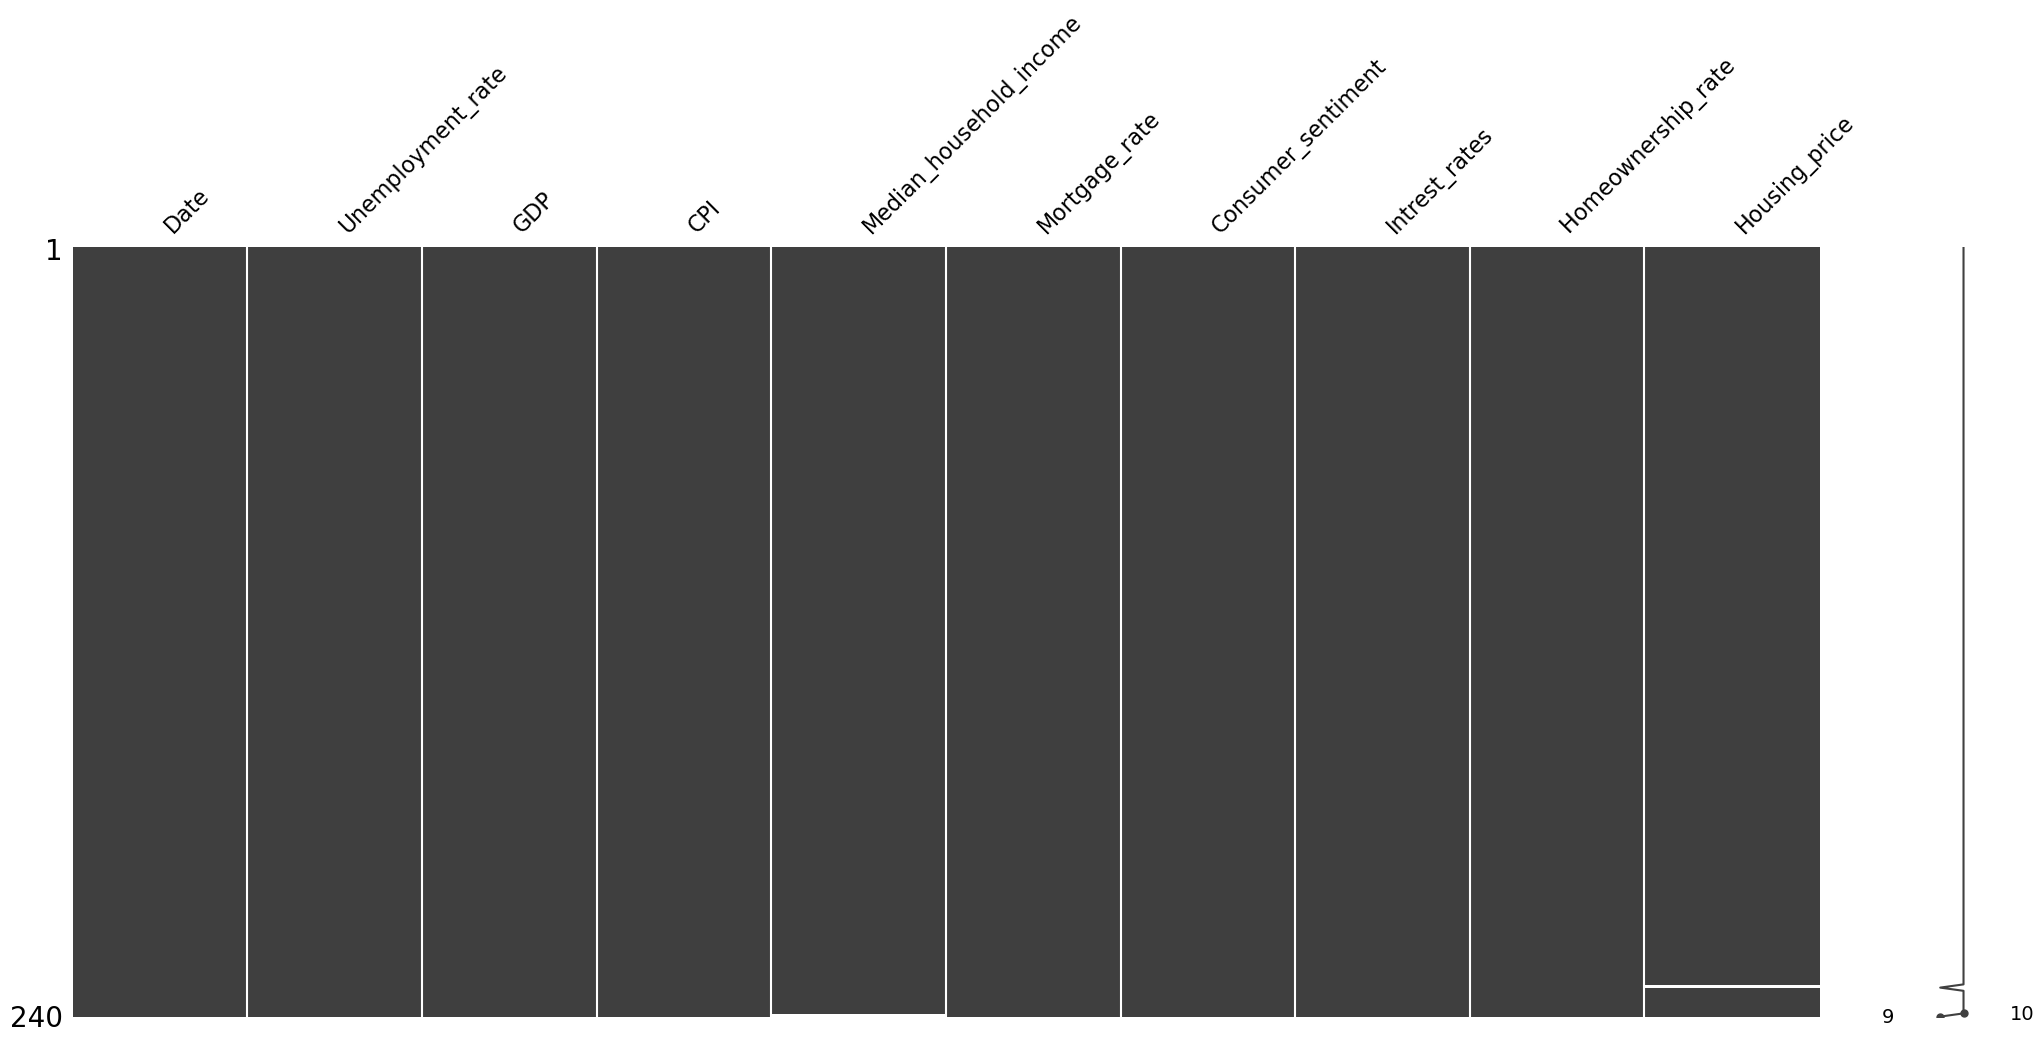

In [56]:
msno.matrix(DF)

* We cant find null values, But there were null values in excel sheet

In [57]:
# Replace empty strings with NaN
df1 = DF.replace(' ', np.nan)

In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     240 non-null    datetime64[ns]
 1   Unemployment_rate        240 non-null    float64       
 2   GDP                      79 non-null     float64       
 3   CPI                      240 non-null    float64       
 4   Median_household_income  17 non-null     float64       
 5   Mortgage_rate            240 non-null    float64       
 6   Consumer_sentiment       240 non-null    float64       
 7   Intrest_rates            240 non-null    float64       
 8   Homeownership_rate       79 non-null     float64       
 9   Housing_price            239 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 18.9 KB


<AxesSubplot: >

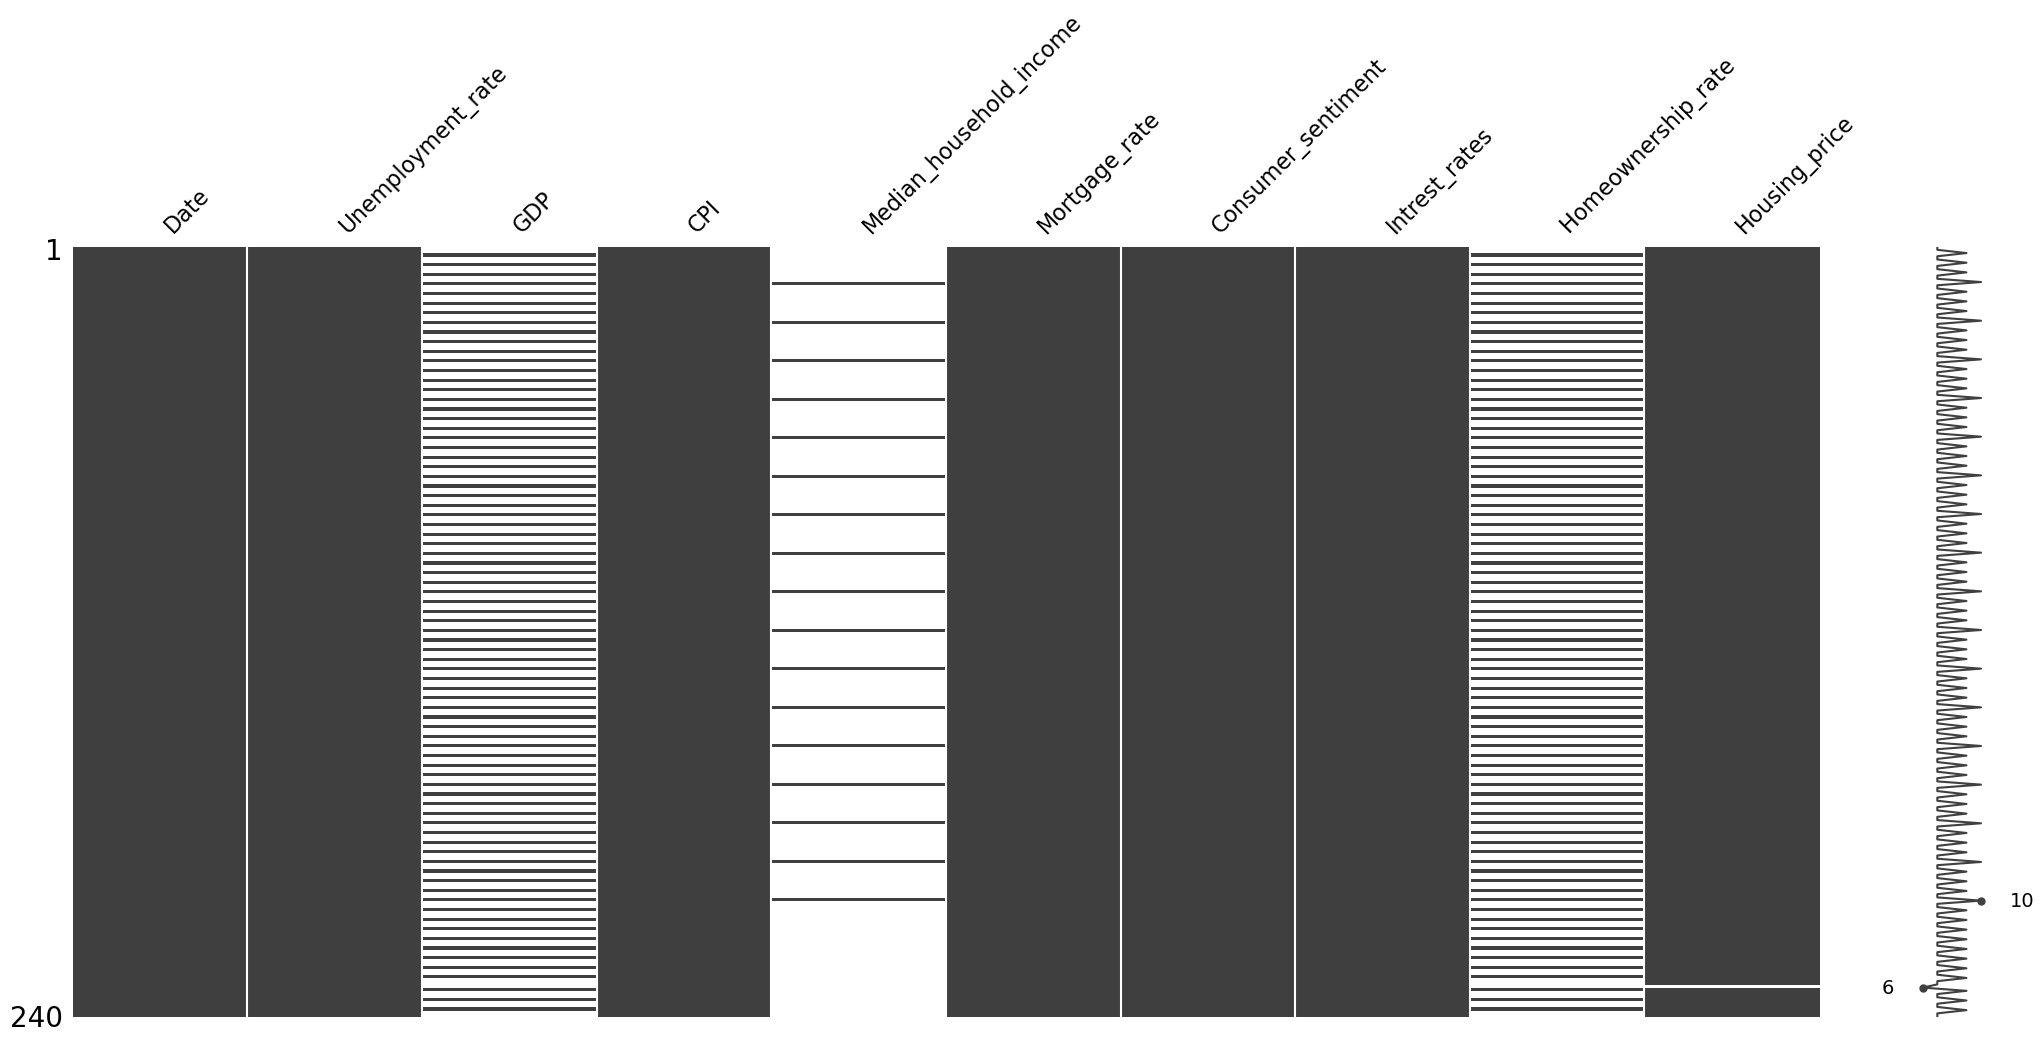

In [59]:
msno.matrix(df1)

In [60]:
df.drop(range(11))
df1.reset_index(drop=True)

,Date,Unemployment_rate,GDP,CPI,Median_household_income,Mortgage_rate,Consumer_sentiment,Intrest_rates,Homeownership_rate,Housing_price
0,2004-02-01,5.6,NaN,2.048137,NaN,5.6350,94.4,1.01,NaN,143.192
1,2004-03-01,5.8,NaN,2.137061,NaN,5.4450,95.8,1.00,NaN,145.058
2,2004-04-01,5.6,14323.017,2.257761,NaN,5.8300,94.2,1.00,69.4,146.592
...,...,...,...,...,...,...,...,...,...,...
237,2023-01-01,3.4,20246.439,6.554492,NaN,6.2725,64.9,4.33,66.0,296.064
238,2023-02-01,3.6,NaN,6.593750,NaN,6.2575,67.0,4.57,NaN,296.926
239,2023-03-01,3.5,NaN,6.451708,NaN,6.5440,62.0,4.65,NaN,298.166


* Now, we can see lot of null values
* GDP and Homeownership_rate has quaterly data
* Median_household_income is yearly data 

# Section 2 - stat description

In [61]:
df1.describe()

,Unemployment_rate,GDP,CPI,Median_household_income,Mortgage_rate,Consumer_sentiment,Intrest_rates,Homeownership_rate,Housing_price
count,240.000000,79.000000,240.000000,17.000000,240.000000,240.000000,240.000000,79.000000,239.000000
mean,5.880000,17111.633165,2.612634,65260.411765,4.707306,80.871667,1.447167,66.048101,189.091515
std,2.110369,1754.901613,1.273935,3820.803434,1.142696,13.332931,1.692092,1.772645,47.110710
...,...,...,...,...,...,...,...,...,...
50%,5.100000,16712.760000,2.338570,64631.000000,4.456750,82.050000,0.400000,65.800000,177.277000
75%,7.350000,18716.744500,2.664786,67571.000000,5.785500,93.025000,2.342500,67.450000,206.296500
max,14.700000,20246.439000,6.617223,72808.000000,6.900000,101.400000,5.260000,69.400000,305.163000


* The minimum and maximum values are 60,313 and 72,808 - Median_household_income
* The minimum and maximum median housing prices are 136 and 305.
* The standard deviation of the unemployment rate is around 2.12%
* The minimum and maximum unemployment rates are 3.4% and 14.7%

# Section 3 - Pre Processing

### 3.a. Null value treatment

* Fix null values, in three columns - GDP, Median_household_income, Homeownership_rate

In [62]:
pd.set_option("display.max_rows",6)
df1

,Date,Unemployment_rate,GDP,CPI,Median_household_income,Mortgage_rate,Consumer_sentiment,Intrest_rates,Homeownership_rate,Housing_price
0,2004-02-01,5.6,NaN,2.048137,NaN,5.6350,94.4,1.01,NaN,143.192
1,2004-03-01,5.8,NaN,2.137061,NaN,5.4450,95.8,1.00,NaN,145.058
2,2004-04-01,5.6,14323.017,2.257761,NaN,5.8300,94.2,1.00,69.4,146.592
...,...,...,...,...,...,...,...,...,...,...
237,2023-01-01,3.4,20246.439,6.554492,NaN,6.2725,64.9,4.33,66.0,296.064
238,2023-02-01,3.6,NaN,6.593750,NaN,6.2575,67.0,4.57,NaN,296.926
239,2023-03-01,3.5,NaN,6.451708,NaN,6.5440,62.0,4.65,NaN,298.166


In [63]:
df1['GDP'] = df1['GDP'].fillna(method='ffill').fillna(method='bfill')

In [64]:
df1['Homeownership_rate '] = df1['Homeownership_rate '].fillna(method='ffill').fillna(method='bfill')


In [65]:
df1

,Date,Unemployment_rate,GDP,CPI,Median_household_income,Mortgage_rate,Consumer_sentiment,Intrest_rates,Homeownership_rate,Housing_price
0,2004-02-01,5.6,14323.017,2.048137,NaN,5.6350,94.4,1.01,69.4,143.192
1,2004-03-01,5.8,14323.017,2.137061,NaN,5.4450,95.8,1.00,69.4,145.058
2,2004-04-01,5.6,14323.017,2.257761,NaN,5.8300,94.2,1.00,69.4,146.592
...,...,...,...,...,...,...,...,...,...,...
237,2023-01-01,3.4,20246.439,6.554492,NaN,6.2725,64.9,4.33,66.0,296.064
238,2023-02-01,3.6,20246.439,6.593750,NaN,6.2575,67.0,4.57,66.0,296.926
239,2023-03-01,3.5,20246.439,6.451708,NaN,6.5440,62.0,4.65,66.0,298.166


In [66]:
df1['Median_household_income'].interpolate(method='linear', inplace=True)
df['Median_household_income'].ffill(inplace=True)

df1

,Date,Unemployment_rate,GDP,CPI,Median_household_income,Mortgage_rate,Consumer_sentiment,Intrest_rates,Homeownership_rate,Housing_price
0,2004-02-01,5.6,14323.017,2.048137,NaN,5.6350,94.4,1.01,69.4,143.192
1,2004-03-01,5.8,14323.017,2.137061,NaN,5.4450,95.8,1.00,69.4,145.058
2,2004-04-01,5.6,14323.017,2.257761,NaN,5.8300,94.2,1.00,69.4,146.592
...,...,...,...,...,...,...,...,...,...,...
237,2023-01-01,3.4,20246.439,6.554492,70784.0,6.2725,64.9,4.33,66.0,296.064
238,2023-02-01,3.6,20246.439,6.593750,70784.0,6.2575,67.0,4.57,66.0,296.926
239,2023-03-01,3.5,20246.439,6.451708,70784.0,6.5440,62.0,4.65,66.0,298.166


In [67]:
df1

,Date,Unemployment_rate,GDP,CPI,Median_household_income,Mortgage_rate,Consumer_sentiment,Intrest_rates,Homeownership_rate,Housing_price
0,2004-02-01,5.6,14323.017,2.048137,NaN,5.6350,94.4,1.01,69.4,143.192
1,2004-03-01,5.8,14323.017,2.137061,NaN,5.4450,95.8,1.00,69.4,145.058
2,2004-04-01,5.6,14323.017,2.257761,NaN,5.8300,94.2,1.00,69.4,146.592
...,...,...,...,...,...,...,...,...,...,...
237,2023-01-01,3.4,20246.439,6.554492,70784.0,6.2725,64.9,4.33,66.0,296.064
238,2023-02-01,3.6,20246.439,6.593750,70784.0,6.2575,67.0,4.57,66.0,296.926
239,2023-03-01,3.5,20246.439,6.451708,70784.0,6.5440,62.0,4.65,66.0,298.166


In [68]:
df1 = df1.drop(df1.index[:11])


In [69]:
df1

,Date,Unemployment_rate,GDP,CPI,Median_household_income,Mortgage_rate,Consumer_sentiment,Intrest_rates,Homeownership_rate,Housing_price
11,2005-01-01,5.3,14767.846,2.315890,64427.000000,5.7100,95.5,2.28,69.2,161.288
12,2005-02-01,5.4,14767.846,2.286245,64468.916667,5.6275,94.1,2.50,69.2,163.344
13,2005-03-01,5.2,14767.846,2.246153,64510.833333,5.9280,92.6,2.63,69.2,165.812
...,...,...,...,...,...,...,...,...,...,...
237,2023-01-01,3.4,20246.439,6.554492,70784.000000,6.2725,64.9,4.33,66.0,296.064
238,2023-02-01,3.6,20246.439,6.593750,70784.000000,6.2575,67.0,4.57,66.0,296.926
239,2023-03-01,3.5,20246.439,6.451708,70784.000000,6.5440,62.0,4.65,66.0,298.166


### 3.b. Outlier treatment

In [70]:
columns_to_check = ['Unemployment_rate', 'GDP', 'CPI', 'Median_household_income', 'Mortgage_rate', 'Consumer_sentiment',
                    'Intrest_rates', 'Homeownership_rate ', 'Housing_price']
df1[columns_to_check] = df1[columns_to_check].apply(pd.to_numeric, errors='coerce')
z_scores = np.abs(zscore(df1[columns_to_check]))
outlier_threshold = 3
outlier_rows = np.any(z_scores > outlier_threshold, axis=1)
outliers = df1[outlier_rows]

print(outliers)


          Date  Unemployment_rate        GDP       CPI  \
194 2020-04-01               14.7  17378.712  2.226352   
195 2020-05-01               13.2  17378.712  2.084208   
226 2022-12-01                3.5  20182.491  6.617223   
..         ...                ...        ...       ...   
236 2022-12-01                3.5  20182.491  6.617223   
237 2023-01-01                3.4  20246.439  6.554492   
238 2023-02-01                3.6  20246.439  6.593750   

     Median_household_income  Mortgage_rate  Consumer_sentiment  \
194                  71085.5         3.3060                71.8   
195                  71052.0         3.2325                72.3   
226                  70784.0         6.3640                59.7   
..                       ...            ...                 ...   
236                  70784.0         6.3640                59.7   
237                  70784.0         6.2725                64.9   
238                  70784.0         6.2575                67.0   

* Its not a appropriate option to drop outlier values here, Because with respect to the problem statement,   296.926 - Housing price index is not outlier its fact, so its not ideal to treat outliers

# Section 4 - Exploratory data analysis

* Lets Answer the important question how Hosuing price index gets effected by other supply factors out there, For this we need to see the correlation

In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 11 to 239
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     229 non-null    datetime64[ns]
 1   Unemployment_rate        229 non-null    float64       
 2   GDP                      229 non-null    float64       
 3   CPI                      229 non-null    float64       
 4   Median_household_income  229 non-null    float64       
 5   Mortgage_rate            229 non-null    float64       
 6   Consumer_sentiment       229 non-null    float64       
 7   Intrest_rates            229 non-null    float64       
 8   Homeownership_rate       229 non-null    float64       
 9   Housing_price            228 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 18.0 KB


In [72]:
df1.dropna(subset=['Housing_price'])

,Date,Unemployment_rate,GDP,CPI,Median_household_income,Mortgage_rate,Consumer_sentiment,Intrest_rates,Homeownership_rate,Housing_price
11,2005-01-01,5.3,14767.846,2.315890,64427.000000,5.7100,95.5,2.28,69.2,161.288
12,2005-02-01,5.4,14767.846,2.286245,64468.916667,5.6275,94.1,2.50,69.2,163.344
13,2005-03-01,5.2,14767.846,2.246153,64510.833333,5.9280,92.6,2.63,69.2,165.812
...,...,...,...,...,...,...,...,...,...,...
237,2023-01-01,3.4,20246.439,6.554492,70784.000000,6.2725,64.9,4.33,66.0,296.064
238,2023-02-01,3.6,20246.439,6.593750,70784.000000,6.2575,67.0,4.57,66.0,296.926
239,2023-03-01,3.5,20246.439,6.451708,70784.000000,6.5440,62.0,4.65,66.0,298.166


In [73]:
for column in df1.columns:
    if column != 'Housing_price' and df1[column].dtype in [np.float64, np.int64]:
        # Calculate the correlation coefficient between the current column and Housing_price
        corr = df1[column].corr(df1['Housing_price'].dropna())
        print(f"Correlation coefficient ({column} vs. Housing_price): {corr}")




Correlation coefficient (Unemployment_rate vs. Housing_price): -0.5834279406569531
Correlation coefficient (GDP vs. Housing_price): 0.8519928416718247
Correlation coefficient (CPI vs. Housing_price): 0.805781454486465
Correlation coefficient (Median_household_income vs. Housing_price): 0.8414162849524457
Correlation coefficient (Mortgage_rate vs. Housing_price): 0.07759775332159355
Correlation coefficient (Consumer_sentiment vs. Housing_price): -0.20768700673087553
Correlation coefficient (Intrest_rates vs. Housing_price): 0.2743479190867946
Correlation coefficient (Homeownership_rate  vs. Housing_price): -0.1180019732602069


In [74]:
for column in df1.columns:
    if column != 'Housing_price':
       
        fig = px.scatter(df1, x=column, y='Housing_price', title=f"<b>{column} vs. Housing Price</b>")
        fig.show()


In [75]:
df1

,Date,Unemployment_rate,GDP,CPI,Median_household_income,Mortgage_rate,Consumer_sentiment,Intrest_rates,Homeownership_rate,Housing_price
11,2005-01-01,5.3,14767.846,2.315890,64427.000000,5.7100,95.5,2.28,69.2,161.288
12,2005-02-01,5.4,14767.846,2.286245,64468.916667,5.6275,94.1,2.50,69.2,163.344
13,2005-03-01,5.2,14767.846,2.246153,64510.833333,5.9280,92.6,2.63,69.2,165.812
...,...,...,...,...,...,...,...,...,...,...
237,2023-01-01,3.4,20246.439,6.554492,70784.000000,6.2725,64.9,4.33,66.0,296.064
238,2023-02-01,3.6,20246.439,6.593750,70784.000000,6.2575,67.0,4.57,66.0,296.926
239,2023-03-01,3.5,20246.439,6.451708,70784.000000,6.5440,62.0,4.65,66.0,298.166


In [76]:
df1 = df1.dropna(subset=['Housing_price'])

# Section 5 - Scaling

In [77]:
from sklearn.preprocessing import StandardScaler

features = df1.drop(['Date','Housing_price'], axis=1)
target = df1['Housing_price']  

scaler = StandardScaler()

scaled_features = scaler.fit_transform(features)


In [78]:
scaled_features

array([[-0.28238884, -1.44468383, -0.23336543, ...,  1.1473721 ,
         0.49227261,  1.94506583],
       [-0.23593527, -1.44468383, -0.25655771, ...,  1.04173271,
         0.62051814,  1.94506583],
       [-0.32884242, -1.44468383, -0.28792285, ...,  0.92854766,
         0.69629958,  1.94506583],
       ...,
       [-1.16500679,  1.78800891,  3.08259154, ..., -1.16160296,
         1.68728776,  0.04377962],
       [-1.07209963,  1.78800891,  3.11330362, ..., -1.00314389,
         1.82719197,  0.04377962],
       [-1.11855321,  1.78800891,  3.00218111, ..., -1.3804274 ,
         1.87382671,  0.04377962]])

In [79]:
scaled_features = pd.DataFrame(scaled_features, columns=features.columns)

In [80]:
scaled_features

,Unemployment_rate,GDP,CPI,Median_household_income,Mortgage_rate,Consumer_sentiment,Intrest_rates,Homeownership_rate
0,-0.282389,-1.444684,-0.233365,-0.402198,0.938690,1.147372,0.492273,1.945066
1,-0.235935,-1.444684,-0.256558,-0.391448,0.865974,1.041733,0.620518,1.945066
2,-0.328842,-1.444684,-0.287923,-0.380697,1.130836,0.928548,0.696300,1.945066
...,...,...,...,...,...,...,...,...
225,-1.165007,1.788009,3.082592,1.228199,1.434480,-1.161603,1.687288,0.043780
226,-1.072100,1.788009,3.113304,1.228199,1.421259,-1.003144,1.827192,0.043780
227,-1.118553,1.788009,3.002181,1.228199,1.673782,-1.380427,1.873827,0.043780


scaler = MinMaxScaler()
columns_to_scale = ['Unemployment_rate', 'GDP', 'CPI', 'Median_household_income', 'Mortgage_rate',
                    'Consumer_sentiment', 'Intrest_rates', 'Homeownership_rate ']

df1[columns_to_scale] = scaler.fit_transform(df1[columns_to_scale])


# Section 5 - Model Building

* Lets go with linear regression since problem statement is regression 

In [81]:
X = scaled_features
y = df1['Housing_price'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

n = X_test.shape[1]
N = len(X_test)
adj_r2 = 1 - (1 - r2) * (N - 1) / (N - n - 1)


print('Mean Squared Error:', mse)
print('R2-squared:', r2)
print('Adjusted R2-squared:', adj_r2)

Mean Squared Error: 75.9609409138579
R2-squared: 0.9653610235590028
Adjusted R2-squared: 0.9578715151393277


MODEL RESULT : The adjusted R2-squared value of 0.9578 indicates that approximately 95.78% of the variability in the house prices can be explained by the independent variables included in the linear regression model. This implies that the chosen independent variables have a strong influence on the predicted house prices.

In [82]:
residuals = y_test - y_pred

In [83]:
training_r2_score = model.score(X_train, y_train)

print('training_r2_score :',training_r2_score )

training_r2_score : 0.9634679969835231


* our traing score is perfect, it clearly states, there is no over fitting 

In [84]:
X = scaled_features
y = df1['Housing_price']

X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# Add a constant column to X
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Get the model summary
summary = results.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:          Housing_price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     734.2
Date:                Tue, 04 Jul 2023   Prob (F-statistic):          1.43e-153
Time:                        11:45:29   Log-Likelihood:                -823.96
No. Observations:                 228   AIC:                             1666.
Df Residuals:                     219   BIC:                             1697.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Homoscedasticity

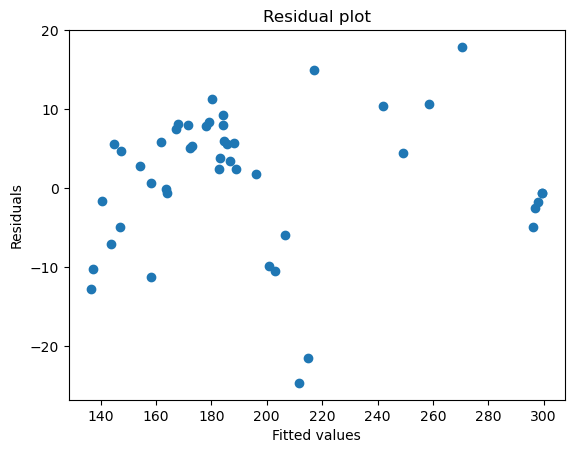

In [85]:
plt.scatter(y_test, residuals)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residual plot")
plt.show()

* we can clearly oberserve that, our data follows homoscedasticity

### Multicollinearity

In [86]:
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

               Variable        VIF
0                 const   1.000000
1     Unemployment_rate   4.593590
2                   GDP  18.644914
..                  ...        ...
6    Consumer_sentiment   5.775270
7         Intrest_rates   8.682140
8   Homeownership_rate    7.728857

[9 rows x 2 columns]


* Haha, unfortunately, our data as multicollinearity, this is very much common while dealing with home price predictions, This can be solved easily by dropping high VIF score featues, it was just human tendancy for me to have as many features as possible thinking if i have more data, i can build a good model, We can easily deal with multicollinearity, while we solving the problem at micro level( individual analysis for each state or city) 

### Normality 

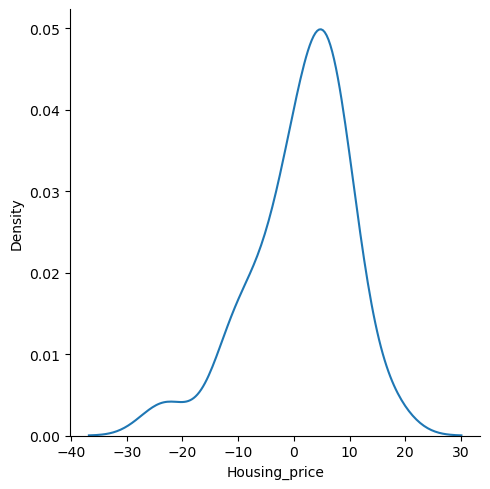

In [87]:
sns.displot(residuals,kind='kde')

* There is bit bump at begining, its fine, overall our data had normal distribution

### Summary

*F-statistic: The F-statistic is 734.2, and the associated p-value is very close to zero (1.43e-153). This indicates that there is strong evidence to reject the null hypothesis that all the coefficients in the model are zero, suggesting that the overall model is statistically significant.

*Coefficients: The coefficients represent the estimated effect of each independent variable on the dependent variable (Housing_price). For example:

The coefficient for the variable 'GDP' is 0.0237. Holding all other variables constant, a one-unit increase in GDP is associated with an average increase of 0.0237 units in Housing_price.
The coefficient for the variable 'Unemployment_rate' is -2.9976. Holding all other variables constant, a one-unit increase in the unemployment rate is associated with an average decrease of 2.9976 units in Housing_price.
Similarly, you can interpret the coefficients for the other variables.

*Standard Errors and p-values: The standard errors estimate the variability of the coefficient estimates. The p-values associated with each coefficient test the null hypothesis that the corresponding coefficient is zero. A p-value less than the significance level (usually 0.05) suggests that the coefficient is statistically significant.

### Influence of factors

1 - Unemployment Rate vs. Housing Price: There is a moderately strong negative correlation (-0.591) between the unemployment rate and housing prices. This suggests that as the unemployment rate increases, housing prices tend to decrease.

2 - GDP vs. Housing Price: There is a strong positive correlation (0.859) between GDP and housing prices. This implies that as the GDP increases, housing prices also tend to increase.

3 - CPI vs. Housing Price: There is a strong positive correlation (0.806) between the Consumer Price Index (CPI) and housing prices. This indicates that as the CPI rises, housing prices generally increase as well.

4 - Median Household Income vs. Housing Price: There is a strong positive correlation (0.841) between median household income and housing prices. This suggests that as median household income rises, housing prices also tend to increase.

5 - Mortgage Rate vs. Housing Price: There is a weak positive correlation (0.093) between mortgage rates and housing prices. This indicates that there is a slight positive relationship between mortgage rates and housing prices, but it is not significant.

6 - Consumer Sentiment vs. Housing Price: There is a weak negative correlation (-0.198) between consumer sentiment and housing prices. This suggests that as consumer sentiment decreases, housing prices may slightly decrease as well.

7 - Interest Rates vs. Housing Price: There is a weak positive correlation (0.288) between interest rates and housing prices. This implies that as interest rates increase, housing prices may slightly increase as well.

8 - Homeownership Rate vs. Housing Price: There is a weak negative correlation (-0.097) between homeownership rate and housing prices. This suggests that as the homeownership rate decreases, housing prices may slightly decrease as well.

# Thank You